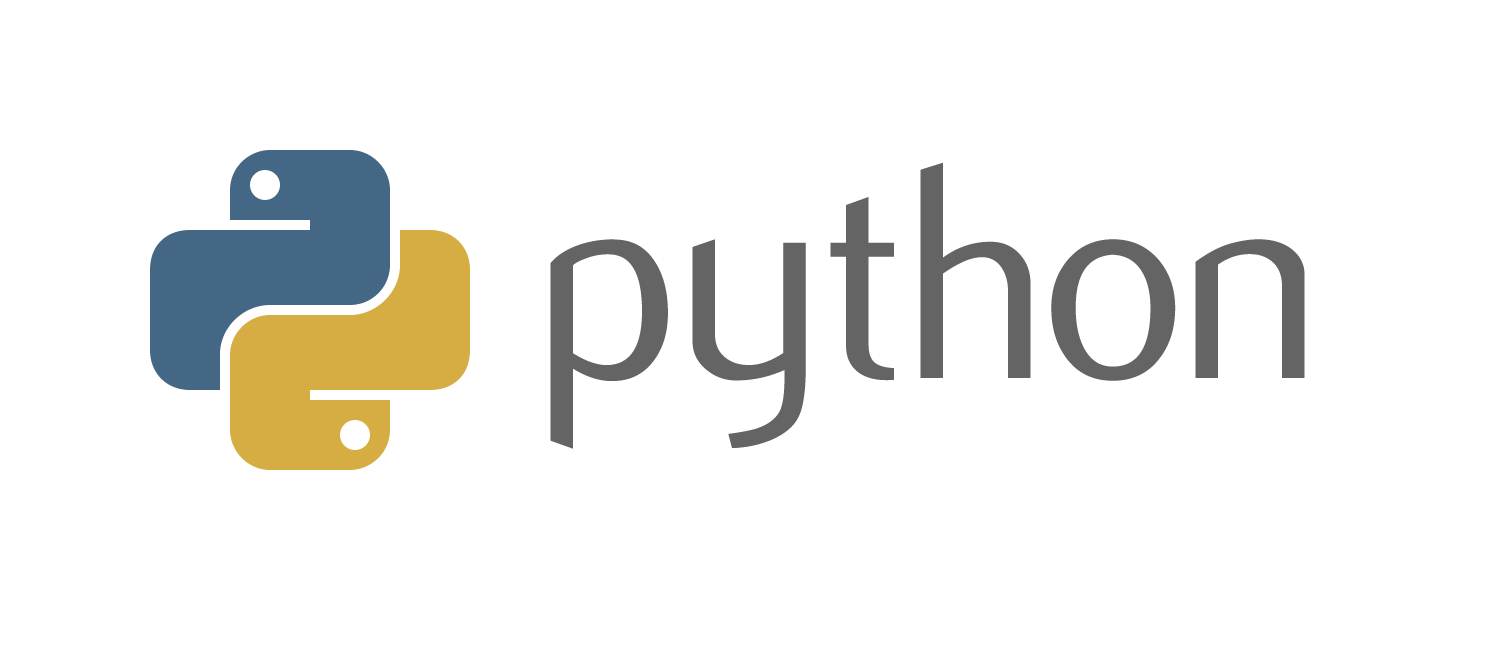

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
from datetime import datetime 
import statistics
import itertools 
from sklearn import preprocessing 
import pymysql


## Question 1:

In [2]:
df81=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
u=df81['occupation'].value_counts()
print("Count of Patients registered in each unique occupation:")
print(u)

Count of Patients registered in each unique occupation:
occupation
UrbanResident    1670
farmer            198
Others             89
worker             17
Officer             7
Name: count, dtype: int64


## Question 2:

Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'GCS')

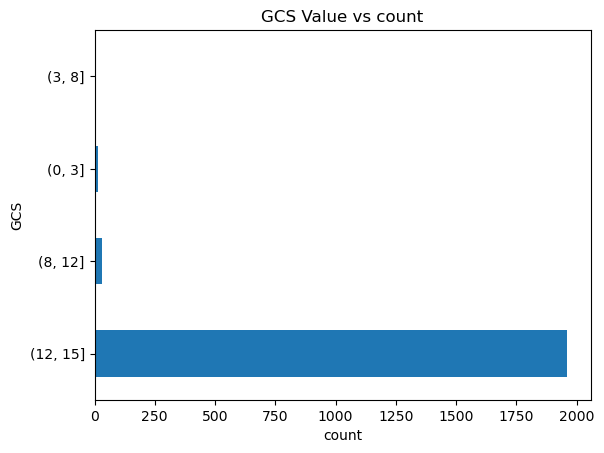

In [3]:
df2=pd.read_excel('Cardiac_Outcomes.xlsx', 'Responsivenes')
bins=[0,3,8,12,15]
slab_count=pd.cut(df2['GCS'],bins=bins).value_counts(dropna=False).plot(kind='barh')
print(slab_count)
plt.title("GCS Value vs count")
plt.xlabel("count")
plt.ylabel("GCS")

## Question 3:

In [4]:
df83=pd.read_excel('Cardiac_Outcomes.xlsx', 'Hospitalization_Discharge')
import datetime
date= df83['Admission_date']
a = pd.to_datetime(df83['Admission_date'])
b = pd.to_timedelta(df83['dischargeDay'],'d')
df83['Discharge_date'] = a + b
df83['Discharge_date'] = pd.to_datetime(df83['Admission_date']) + pd.to_timedelta(df83['dischargeDay'],'d')
df83

inpatient_number DestinationDischarge admission_ward admission_way  \
0               857781                 Home     Cardiology  NonEmergency   
1               743087                 Home     Cardiology  NonEmergency   
2               866418                 Home     Cardiology  NonEmergency   
3               775928                 Home     Cardiology     Emergency   
4               810128                 Home     Cardiology  NonEmergency   
...                ...                  ...            ...           ...   
2003            740689   HealthcareFacility    GeneralWard     Emergency   
2004            734280   HealthcareFacility    GeneralWard     Emergency   
2005            781004   HealthcareFacility     Cardiology     Emergency   
2006            744870              Unknown     Cardiology  NonEmergency   
2007            791864                 Home     Cardiology     Emergency   

     discharge_department  visit_times respiratory_support oxygen_inhalation  \
0              Cardiology            1                 NaN     OxygenTherapy   
1              Cardiology            1                 NaN     OxygenTherapy   
2              Cardiology            2                 NaN     OxygenTherapy   
3              Cardiology            1                 NaN     OxygenTherapy   
4              Cardiology            1                 NaN     OxygenTherapy   
...                   ...          ...                 ...               ...   
2003          GeneralWard            1                 NaN     OxygenTherapy   
2004          GeneralWard            1                 NaN     OxygenTherapy   
2005           Cardiology            1                 NaN     OxygenTherapy   
2006           Cardiology            1                 IMV     OxygenTherapy   
2007           Cardiology            1                 NaN     OxygenTherapy   

      dischargeDay Admission_date  ... re_admission_within_28_days  \
0               11     2017-01-24  ...                           0   
1                8     2017-05-05  ...                           0   
2                5     2016-11-18  ...                           0   
3               11     2017-10-02  ...                           1   
4                5     2019-11-17  ...                           0   
...            ...            ...  ...                         ...   
2003             5     2016-02-07  ...                           0   
2004             8     2017-03-29  ...                           0   
2005            14     2018-01-22  ...                           0   
2006             1     2019-11-27  ...                           0   
2007             6     2017-02-17  ...                           0   

      death_within_3_months  re_admission_within_3_months  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             1   
4                         0                             0   
...                     ...                           ...   
2003                      0                             0   
2004                      0                             0   
2005                      0                             1   
2006                      1                             0   
2007                      0                             0   

      death_within_6_months  re_admission_within_6_months  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             1   
4                         0                             0   
...                     ...                           ...   
2003                      0                             0   
2004                      0                             0   
2005     

## Question 4:

In [5]:
df84=pd.read_excel('Cardiac_Outcomes.xlsx', 'CardiacComplications')
df84['inpatient_number'].nunique()
a=df84.type_of_heart_failure.value_counts(dropna=False, normalize=True)*100
a=a.reset_index()
a=a.loc[a['type_of_heart_failure']=='Both',['type_of_heart_failure','proportion']]
a=a.iloc[0]
print("Percentage of patients who had Biventricular heart failure:")
print(a)

Percentage of patients who had Biventricular heart failure:
type_of_heart_failure         Both
proportion               73.705179
Name: 0, dtype: object


## Question 5:

In [6]:
df85=pd.read_excel('Cardiac_Outcomes.xlsx', 'Responsivenes')
rtp=df85.consciousness.value_counts()['ResponsiveToPain']
print("Responsive to pain:",rtp)
rts=df85.consciousness.value_counts()['ResponsiveToSound']
print("Responsive to sound:",rts)
r=round(rtp/rts,2)
print("Ratio of patients who were responsive to pain vs responsive to sound:",r)


Responsive to pain: 4
Responsive to sound: 19
Ratio of patients who were responsive to pain vs responsive to sound: 0.21


## Question 6:

In [7]:
df86= pd.read_excel('Cardiac_Outcomes.xlsx','Demography')
df83_O=pd.read_excel('Cardiac_Outcomes.xlsx', 'Hospitalization_Discharge')
df86
def split_age(age):
 return pd.Series(age.split("-", 1))
df86[['Age1', 'Age2']] = df86['ageCat'].apply(split_age)  
df86['Age'] = [np.random.randint(s, e) for s,e in zip(df86['Age1'], df86['Age2'])]
df86.drop(columns=["Age1"], inplace=True)
df86.drop(columns=["Age2"], inplace=True)
a1=df83_O[['inpatient_number','outcome_during_hospitalization']]
a2=df86[['inpatient_number','Age']]
s=a1.merge(a2)
count1=s.loc[(s['outcome_during_hospitalization']=='Alive'),['inpatient_number','Age','outcome_during_hospitalization']]
print(count1)
avg1age=count1['Age'].mean().round()
print("The average age group of the patients that had an outcome of Alive:",avg1age)


      inpatient_number  Age outcome_during_hospitalization
0               857781   74                          Alive
1               743087   69                          Alive
2               866418   65                          Alive
3               775928   71                          Alive
4               810128   74                          Alive
...                ...  ...                            ...
2001            726701   86                          Alive
2002            754589   76                          Alive
2004            734280   85                          Alive
2005            781004   41                          Alive
2007            791864   80                          Alive

[1890 rows x 3 columns]
The average age group of the patients that had an outcome of Alive: 74.0


## Question 7:

In [8]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

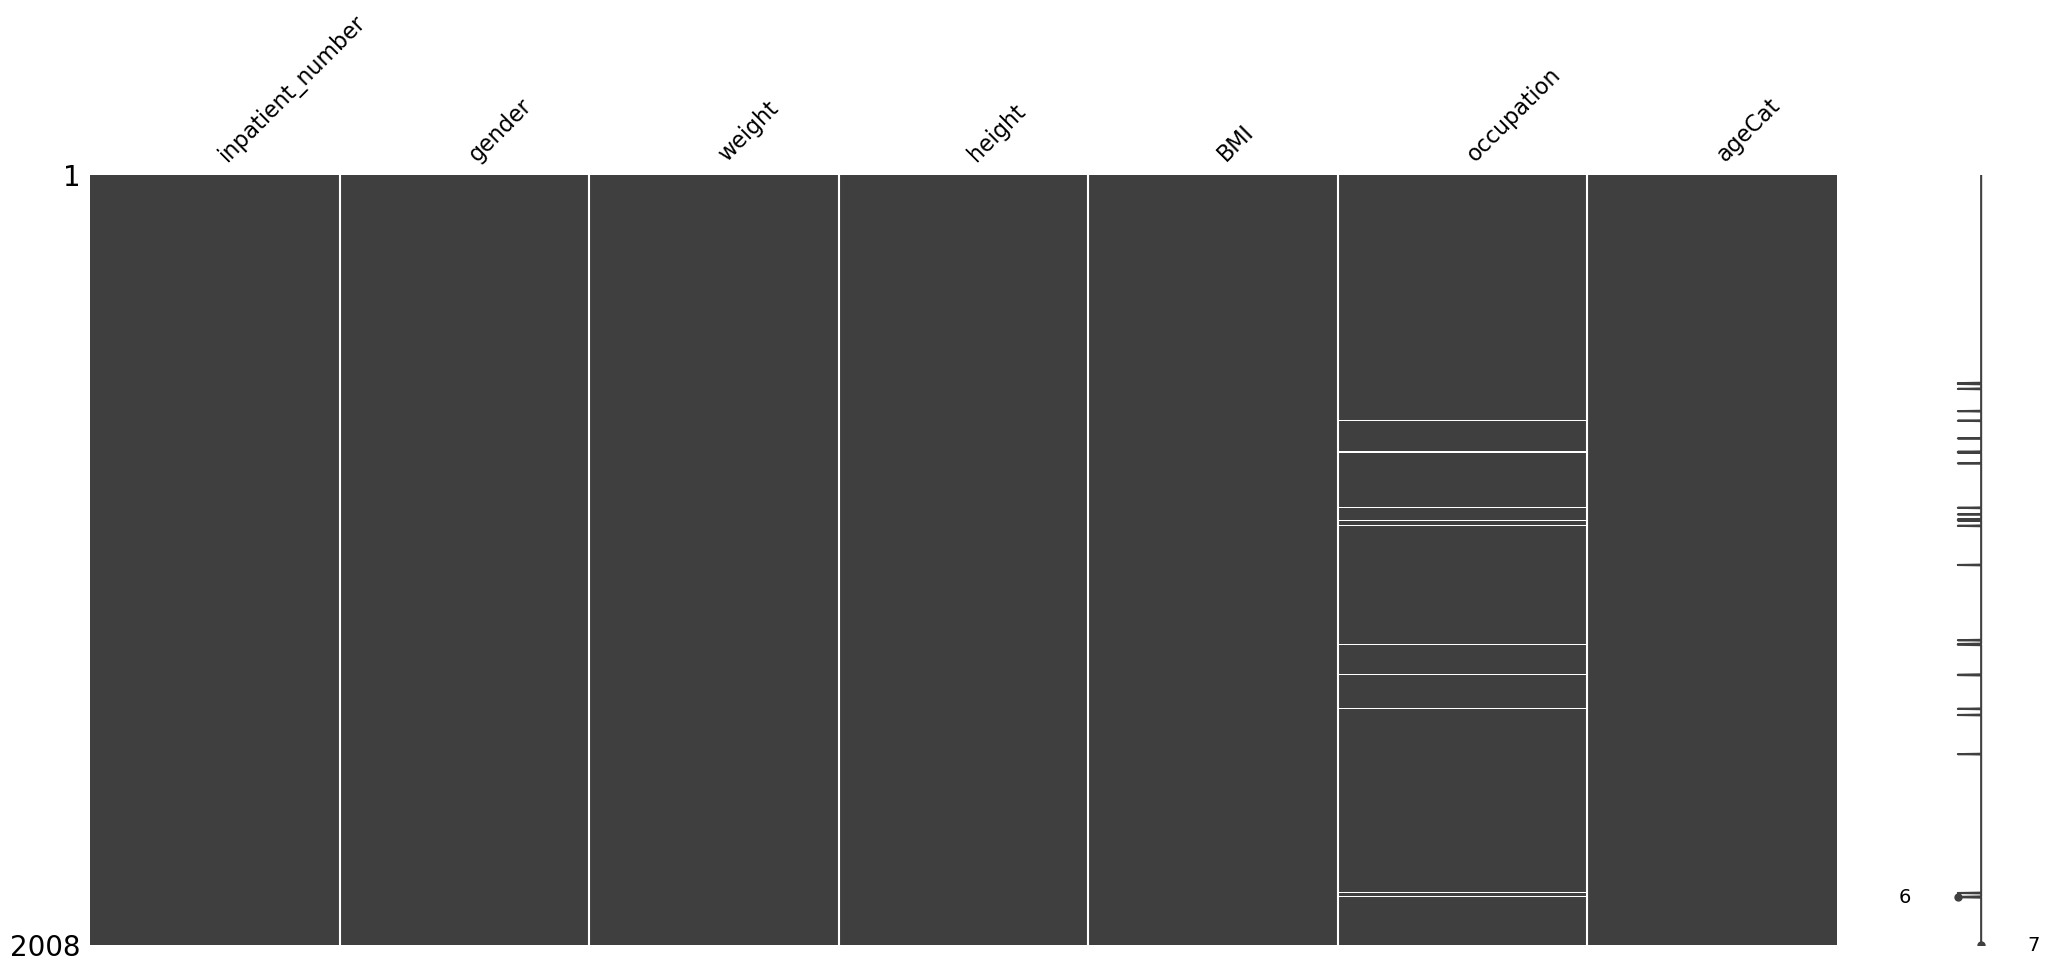

In [9]:
import missingno as msno
df87=pd.read_excel('Cardiac_Outcomes.xlsx','Demography')
msno.matrix(df87)

## Question 8:

In [10]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


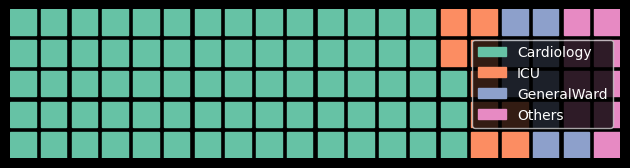

In [11]:

df88=pd.read_excel('Cardiac_Outcomes.xlsx', 'Hospitalization_Discharge')
a=df88.loc[df88['outcome_during_hospitalization']=='Dead','admission_ward'].value_counts()
a=a.reset_index()
total=a['count'].sum()
a['count']=round((a['count']/total)*100,2)
a
from pywaffle import Waffle
plt.style.use("dark_background")
plt.figure(FigureClass= Waffle,rows=5,columns=20,values=a['count'],labels=list(a.admission_ward))
plt.show()

## Question 9:

In [12]:
m1=[[8,9],[23,24]]
m2=[[2,4],[3,9]]
result=[[0,0],[0,0]]
for i in range(len(m1)):
    for j in range (len(m2[0])) :
        for k in range(len(m2)): result[i][j]+=m1[i][j]* m2[k][j]
print("Matrix Multiplication:")
for row in result:
    print(row)

Matrix Multiplication:
[40, 117]
[115, 312]


## Question 10:

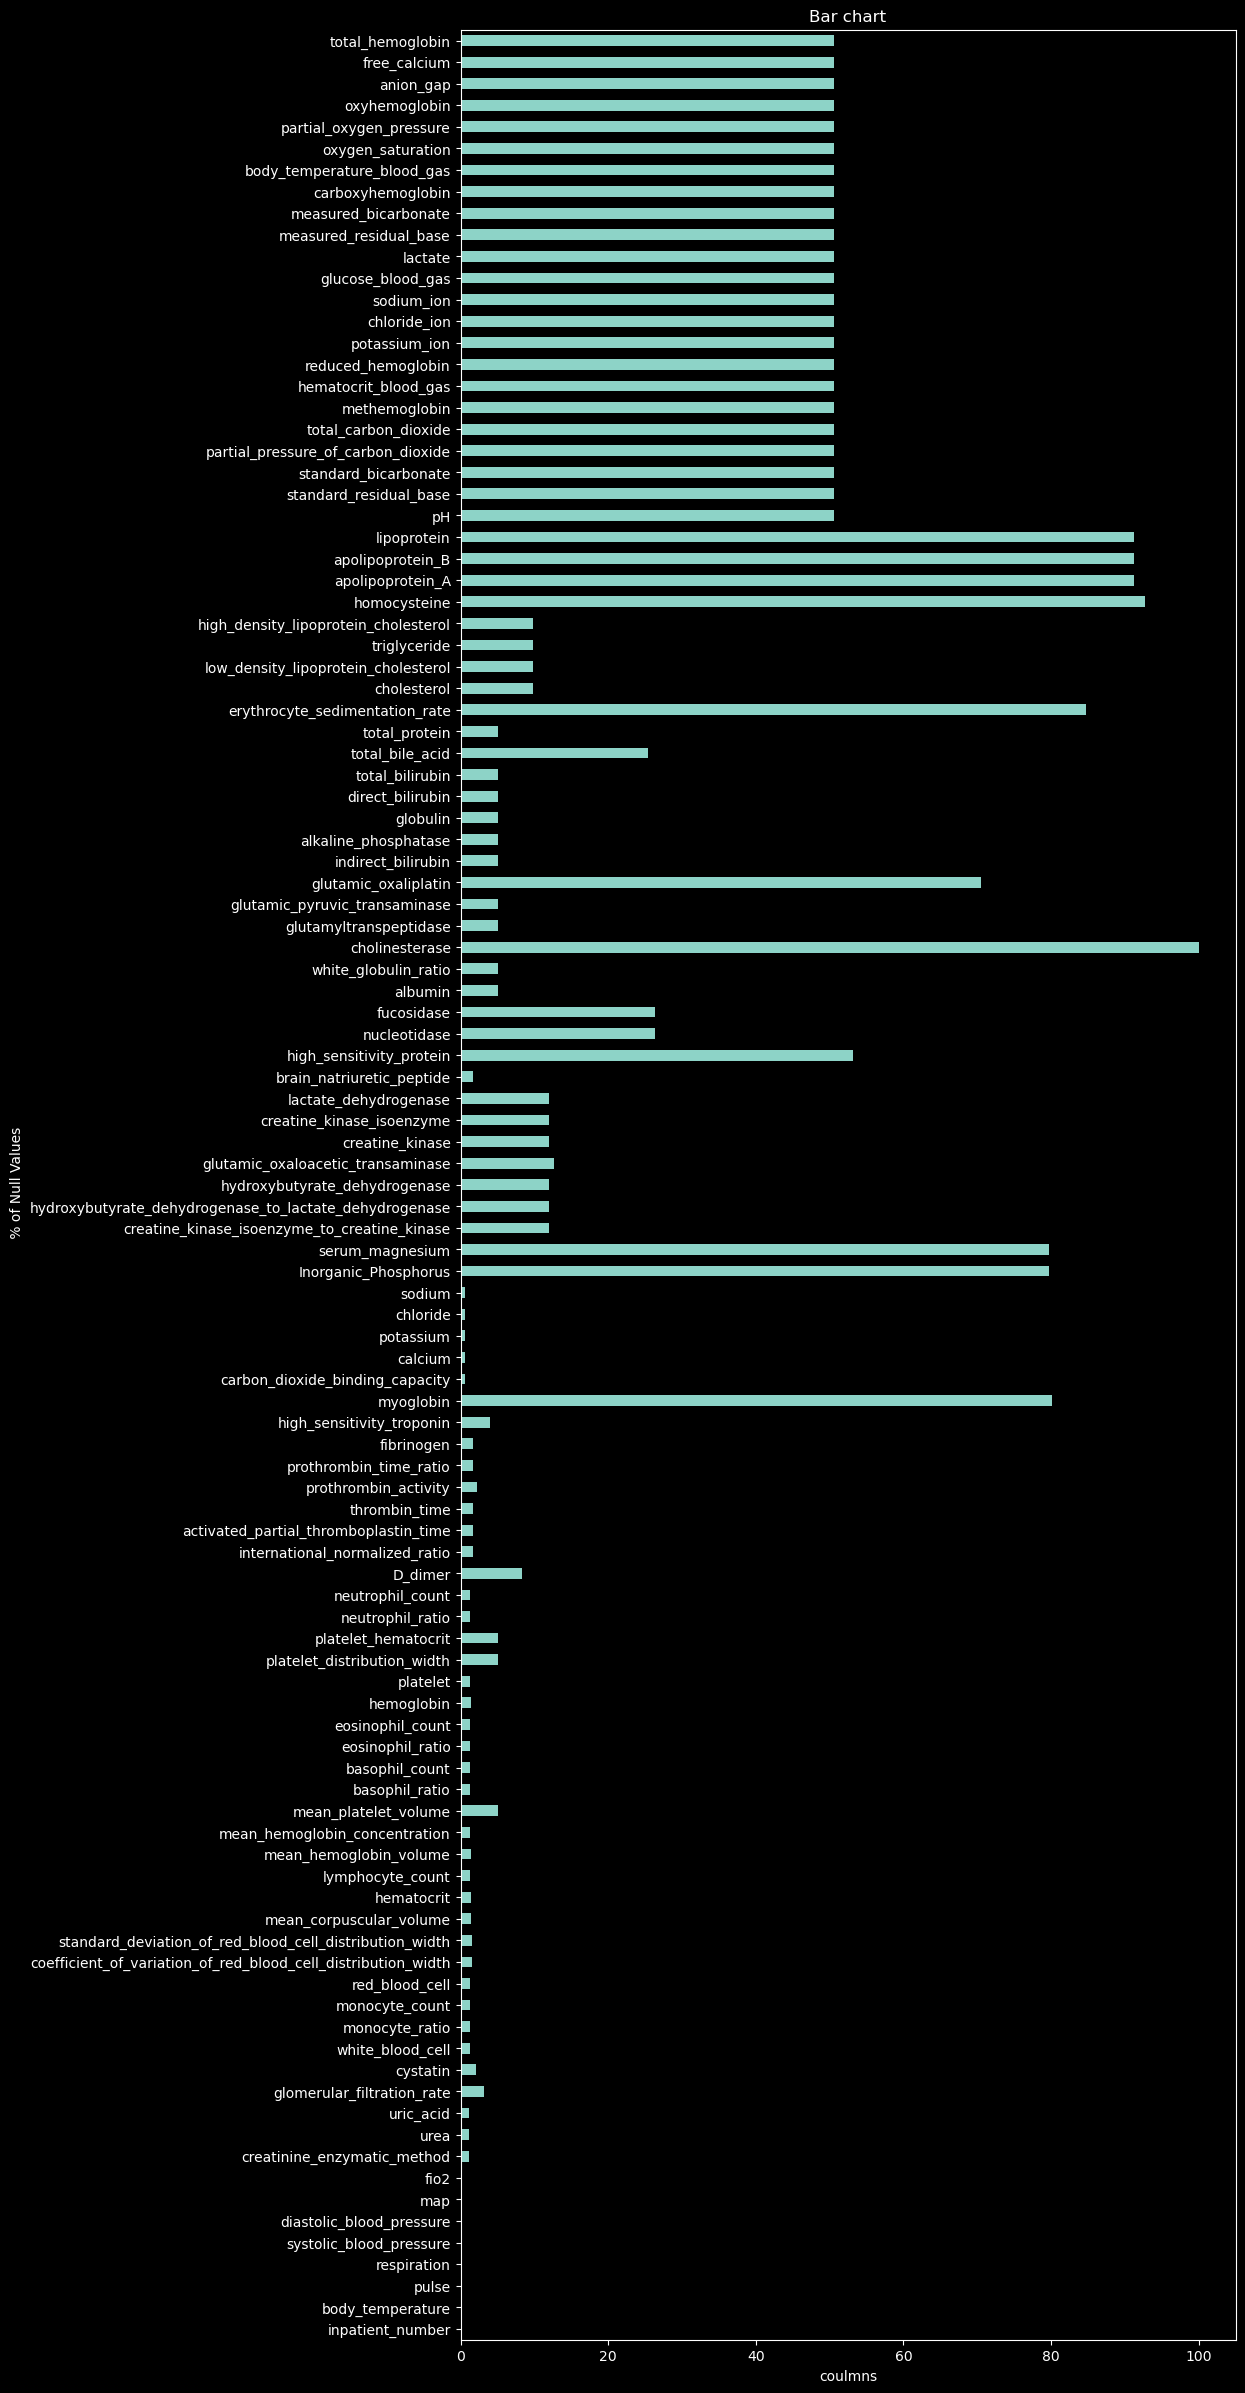

In [13]:
df9=pd.read_excel('Cardiac_Outcomes.xlsx', 'Labs')
plt.figure(figsize=(10,30))
percentage_missing_value=((df9.isnull() | df9.isna()).sum() * 100 / df9.index.size).round(2).plot(kind='barh')
plt.title("Bar chart")
plt.xlabel("coulmns")
plt.ylabel(" % of Null Values")
plt.show()

## Question 11:

In [15]:
import re
n= input('Enter a Mobile Number-')
a=re.fullmatch('[7-9][0-9]{9}',n)
if a != None:
    print('YES')
else:
        print('No')

Enter a Mobile Number- 7898765654


YES


## Question 12:

In [16]:
#If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit 
#and what is the MAP of most patients with this condition?
dflb=pd.read_excel('Cardiac_Outcomes.xlsx', 'Labs')
dfpre=pd.read_excel('Cardiac_Outcomes.xlsx', 'CardiacComplications')
dfpre['left_ventricular_end_diastolic_diameter_LV']=dfpre['left_ventricular_end_diastolic_diameter_LV']/10
f1=pd.DataFrame(dfpre[['inpatient_number','left_ventricular_end_diastolic_diameter_LV']])
g1=pd.DataFrame(dflb[['inpatient_number','map']])
a=f1.merge(g1)
print("MAP of most patients with this condition:")
a=a.loc[~(a['left_ventricular_end_diastolic_diameter_LV']>=3.5) &~( a['left_ventricular_end_diastolic_diameter_LV']<=5.6),('inpatient_number','left_ventricular_end_diastolic_diameter_LV','map')]
print(a)

MAP of most patients with this condition:
      inpatient_number  left_ventricular_end_diastolic_diameter_LV         map
0               857781                                         NaN   76.666667
3               775928                                         NaN   86.000000
5               823318                                         NaN   74.666667
6               844094                                         NaN   79.000000
7               787530                                         NaN   77.333333
...                ...                                         ...         ...
2003            740689                                         NaN   93.333333
2004            734280                                         NaN   97.333333
2005            781004                                         NaN  111.666667
2006            744870                                         NaN   78.666667
2007            791864                                         NaN  100.666667

[697 rows

## Question 13:

     temp_class  dischargeDay
0  Hyperthermia            13
1   Hypothermia           128
2  Within Range          1845


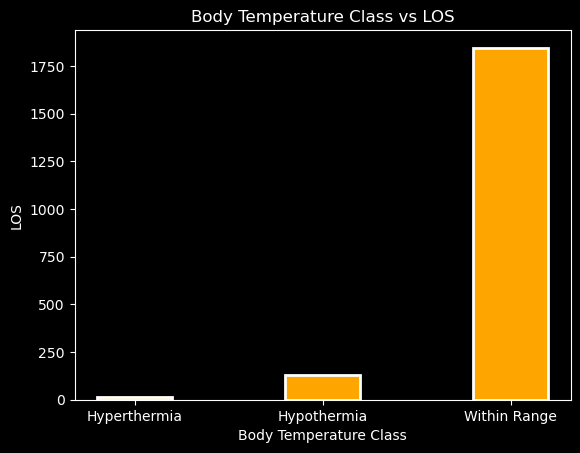

In [17]:
df83=pd.read_excel('Cardiac_Outcomes.xlsx', 'Labs')
dflos=pd.read_excel('Cardiac_Outcomes.xlsx', 'Hospitalization_Discharge')
def temp(body_temperature):
    if body_temperature >= 40:
        return 'Hyperthermia'
    elif (body_temperature >=36) & (body_temperature <= 37.2):
        return 'Within Range'
    elif body_temperature <=35:
        return 'Hypothermia'
    else:
        return 'Fever'
df83['temp_class'] = df83['body_temperature'].apply(temp)
f=pd.DataFrame(df83.loc[df83['temp_class']!='Fever',['temp_class','inpatient_number','body_temperature']])
g=pd.DataFrame(dflos[['dischargeDay','inpatient_number']])
a=f.merge(g)
a=a[['temp_class','dischargeDay']].drop_duplicates()
a=a.groupby(a['temp_class']).sum('dischargeDay')
a=a.reset_index()
print(a)
x=list(a['temp_class'])
y=list(a['dischargeDay'])
plt.style.use("dark_background")
bplot=plt.bar(x,y,color="orange",align= "center",width=0.4,edgecolor="white",lw=2)

plt.title("Body Temperature Class vs LOS")
plt.xlabel("Body Temperature Class")
plt.ylabel("LOS")
plt.show()

## Question 14:

In [19]:
df84=pd.read_excel('Cardiac_Outcomes.xlsx', 'Hospitalization_Discharge')
val = int(input("Enter your value: "))
print("List of patients whose DischargeDay is greater than the value given by the user:")
a=df84[df84.dischargeDay> val].inpatient_number
print(a)
print("Count of patients whose DischargeDay is greater than the value given by the user:",len(a))

Enter your value:  5


List of patients whose DischargeDay is greater than the value given by the user:
0       857781
1       743087
3       775928
5       823318
6       844094
         ...  
2001    726701
2002    754589
2004    734280
2005    781004
2007    791864
Name: inpatient_number, Length: 1580, dtype: int64
Count of patients whose DischargeDay is greater than the value given by the user: 1580


## Question 15:

   ageCat  count
0   69-79    715
1   79-89    646
2   59-69    368
3   49-59    106
4  89-110    101
5   39-49     56
6   29-39     12
7   21-29      4


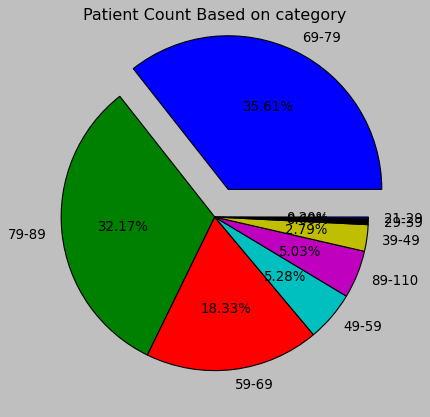

In [20]:
df85=pd.read_excel('Cardiac_Outcomes.xlsx', 'Demography')
df85=df85['ageCat'].value_counts()
a=df85.reset_index()
print(a)
x=a['ageCat']
f=a['count']
plt.style.use("classic")
explodes = [0.2,0,0,0,0,0,0,0]
plt.pie(f,labels= x,explode= explodes,autopct="%0.2f%%")
plt.title("Patient Count Based on category")
plt.show()


## Question 16:

In [21]:
df91=pd.read_excel('Cardiac_Outcomes.xlsx', 'Labs')

df92=pd.read_excel('Cardiac_Outcomes.xlsx', 'CardiacComplications')
df93=pd.read_excel('Cardiac_Outcomes.xlsx','Demography')
df123= pd.concat([df91,df92,df93])
melt_df123 = pd.melt(
    df123, 
    id_vars=['BMI','uric_acid'], 
    value_vars=('myocardial_infarction','congestive_heart_failure','peripheral_vascular_disease'), 
    
    col_level=None
    
)
melt_df123

df_unmelted = melt_df123.pivot_table(
index=['variable'], values=['BMI','uric_acid'],aggfunc='mean'
)
df_unmelted

BMI  uric_acid
variable                                         
congestive_heart_failure     21.791398  483.01864
myocardial_infarction        21.791398  483.01864
peripheral_vascular_disease  21.791398  483.01864

## Question 26:

In [22]:
df9 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Demography')
def split_age(age):
 return pd.Series(age.split("-", 1))
df9[['Age1', 'Age2']] = df9['ageCat'].apply(split_age)  
df9['Age'] = [np.random.randint(s, e) for s,e in zip(df9['Age1'], df9['Age2'])]
df9.drop(columns=["Age1"], inplace=True)
df9.drop(columns=["Age2"], inplace=True)
print(df9)
avgage=df9['Age'].mean().round()
print("Average age of the patients:",avgage)

      inpatient_number  gender  weight  height        BMI     occupation  \
0               857781    Male    50.0    1.64  18.590125  UrbanResident   
1               743087  Female    51.0    1.63  19.195303  UrbanResident   
2               866418    Male    70.0    1.70  24.221453         farmer   
3               775928    Male    65.0    1.70  22.491349  UrbanResident   
4               810128  Female    76.0    1.55  31.633715  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
2003            740689  Female    35.0    1.50  15.555556         Others   
2004            734280  Female    50.0    1.55  20.811655  UrbanResident   
2005            781004    Male    75.0    1.70  25.951557  UrbanResident   
2006            744870    Male    40.0    1.50  17.777778  UrbanResident   
2007            791864  Female    45.0    1.55  18.730489  UrbanResident   

     ageCat  Age  
0     69-79   70  
1     69-79   69  
2     59-69   64  
3     69-79

## Question 27:

In [23]:
today = datetime.date.today()
year = today.year
df9['YearOfBirth']=year-(df9['Age'])
print(df9[['Age','YearOfBirth']])

      Age  YearOfBirth
0      70         1954
1      69         1955
2      64         1960
3      72         1952
4      77         1947
...   ...          ...
2003   84         1940
2004   86         1938
2005   44         1980
2006   57         1967
2007   80         1944

[2008 rows x 2 columns]


## Question 17:

In [24]:
df = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge')  
month=len(df.loc[df['Admission_date'].dt.month==11,'inpatient_number'])
print("Number of patients who were Admitted in the month of November:",month)

Number of patients who were Admitted in the month of November: 195


## Question 18:

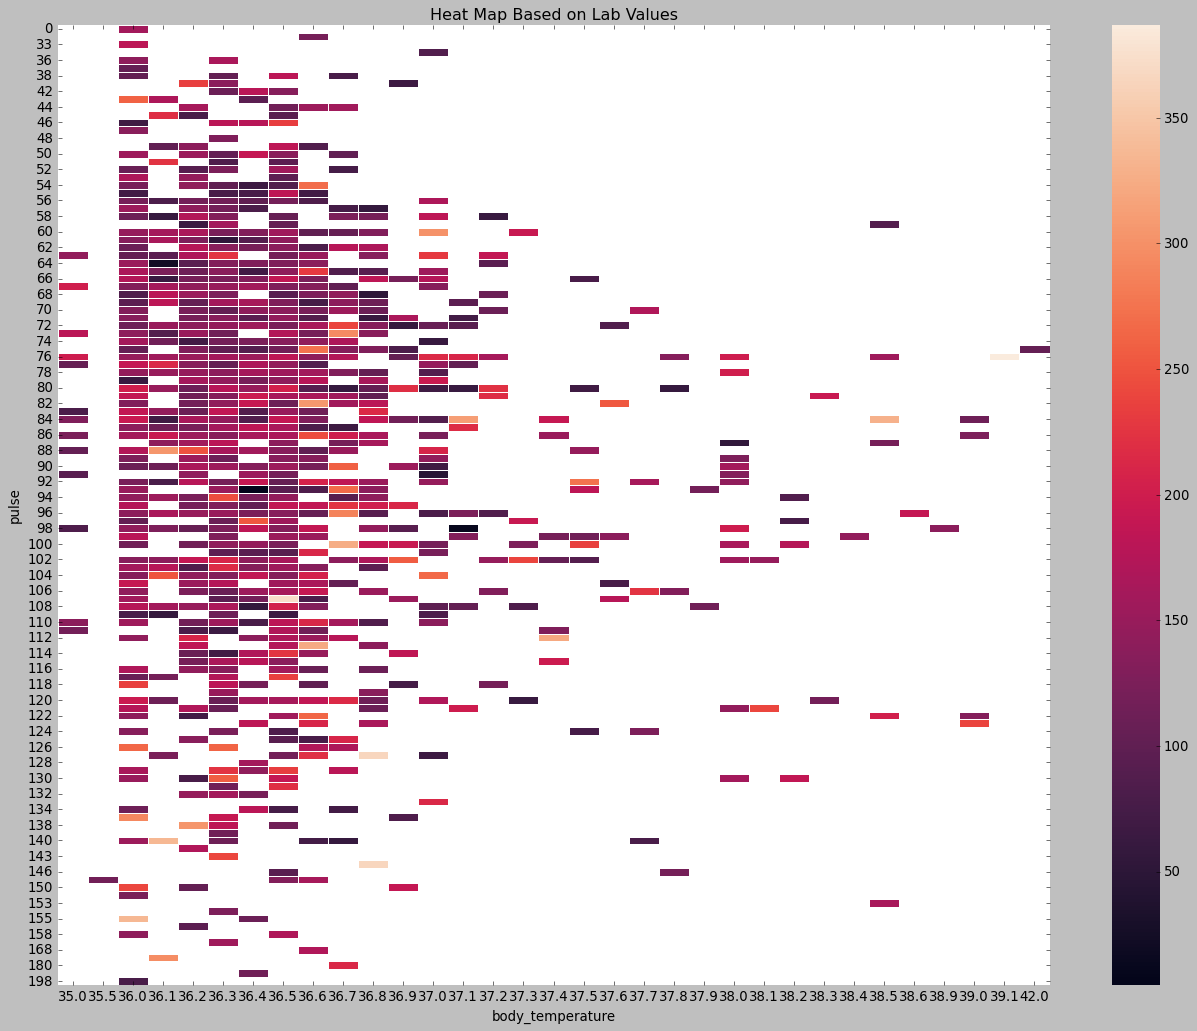

In [25]:
df1 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Labs')
df1=df1.pivot_table(index='pulse',columns='body_temperature',values='platelet')
df1.head(10)
plt.style.use("classic")
plt.figure(figsize=(20,15))
sns.heatmap(df1,linewidth=0.8)
plt.title("Heat Map Based on Lab Values")
plt.show()

 ## Question 19:

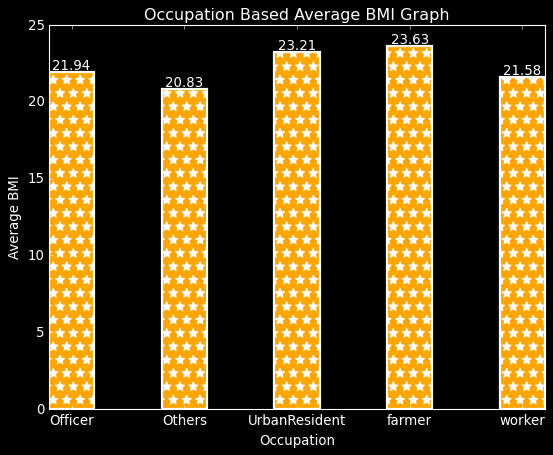

In [26]:
df2 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Demography')
df2=df2[['BMI','occupation']].drop_duplicates()
df2=df2.groupby("occupation").mean('BMI').reset_index()
#df2.info()
x=df2['occupation']
y=df2['BMI']
plt.style.use("dark_background")
bplot=plt.bar(x,y,color="orange",align= "center",width=0.4,edgecolor="white",lw=2,hatch='*')
plt.bar_label(bplot,labels=y.round(2),label_type="edge")
plt.title("Occupation Based Average BMI Graph")
plt.xlabel("Occupation")
plt.ylabel("Average BMI")
plt.show()
#val=df2.groupby("occupation").agg({"BMI":["mean"]}).reset_index()

## Question 20:

In [27]:
x=1
y=1
z=2
n=3
result=[[i,j,k] for i in range(0,x+1) for j in range(y+1) for k in range(z+1) if (i+j+k)!= n]
print("List of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n:","\n",result)

List of all possible coordinates given by(i,j,k) on a 3D grid where the sum of i,j,k is not equal to n: 
 [[0, 0, 0], [0, 0, 1], [0, 0, 2], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 2]]


## Question 21:

In [28]:
python_students = [['Harry', 37.21], ['Berry', 37.21], ['Tina', 37.2], ['Akriti', 41], ['Harsh', 39]]
df5=pd.DataFrame(python_students)
output=[]
nlist=list(df5[0])
slist=list(df5[1])
output.append([[nlist,slist]])
slist = list(set(slist))
slist.sort()
slow=slist[1]
val1=df5.loc[df5[1]==slow,0]
val1=list(val1)
val1.sort()
outcome=np.array(val1)
print("Second lowest score names:")
for x in outcome:
    print(x)

Second lowest score names:
Berry
Harry


## Question 22:

In [29]:
df6=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Patient_Precriptions')
df6=df6['inpatient_number'].value_counts().head(1)
for i in range(len(df6)):
 patient_number=df6.index[i]
print("Patient number with most prescribed drugs:",patient_number)
outcome=df.loc[df['inpatient_number']==patient_number,['inpatient_number','outcome_during_hospitalization']]
age=df9.loc[df9['inpatient_number']==patient_number,['inpatient_number','Age']]
v=outcome.merge(age)
print(v)

Patient number with most prescribed drugs: 777204
   inpatient_number outcome_during_hospitalization  Age
0            777204                          Alive   79


## Question 23:

In [30]:
df7 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Patient_Precriptions')
count=len(df7.loc[df7['Drug_name']=='Digoxin tablet','inpatient_number'])
print("Patients who were prescribed Digoxin:",count)

Patients who were prescribed Digoxin: 999


## Question 24:

Correlations between anemiascore and LOS
 [[1.         0.09062523]
 [0.09062523 1.        ]]


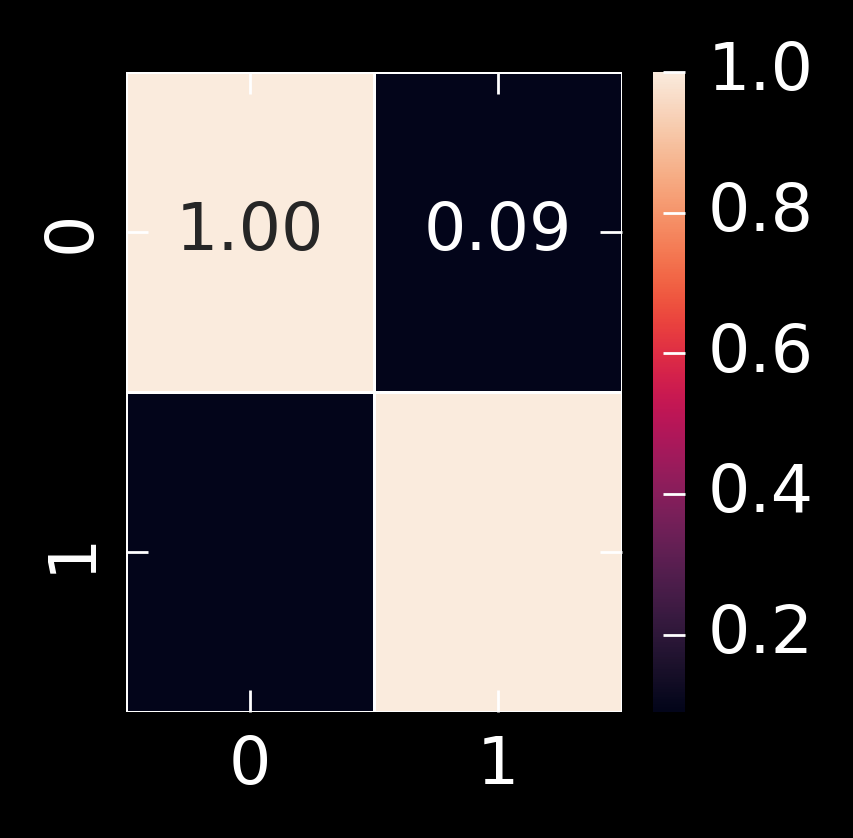

In [31]:
'Normal''Mild''Medim''Severe'
df25=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Labs')
def anemia(hemoglobin):
    if hemoglobin > 120:
        return int(1)
    elif (hemoglobin >=100) & (hemoglobin <= 119):
        return int(2)
    elif (hemoglobin >=70) & (hemoglobin <= 99):
        return int(3)
    elif hemoglobin <70:
        return int(4)
    else:
        return int(0)
                

df25['anemiascore'] = df25['hemoglobin'].apply(anemia)
f=pd.DataFrame(df25[['anemiascore','inpatient_number']])
g=pd.DataFrame(df[['dischargeDay','inpatient_number']])
a=f.merge(g)
c = np.corrcoef(a['anemiascore'],a['dischargeDay'])
print('Correlations between anemiascore and LOS\n',c)
plt.figure(figsize=(2,2), dpi =400)
sns.heatmap(c,annot=True,fmt=".2f", linewidth=.5)
plt.show()

## Question 25:

In [32]:
df8 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Responsivenes')
count=len(df8.loc[ (df8['GCS']<=8),'GCS'])
print("Count of Patients who are considered to be in a coma:",count)

Count of Patients who are considered to be in a coma: 19


## Question 28:

In [33]:
df10 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Demography')
dict={}
for i,r in df10.head(10).iterrows():
    dict[r['inpatient_number']]= r['gender']
print("FIRST 10 VALUES:",dict)


FIRST 10 VALUES: {857781: 'Male', 743087: 'Female', 866418: 'Male', 775928: 'Male', 810128: 'Female', 823318: 'Female', 844094: 'Male', 787530: 'Female', 795420: 'Female', 829801: 'Female'}


## Question 29:

In [34]:
df13 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='PatientHistory')
count1=len(df8.loc[ (df8['GCS']<=8),'GCS'])
print("Count of people having Coma:",count1)
a1=df13[['inpatient_number','diabetes']]
a2=df8[['inpatient_number','GCS']]
s=a1.merge(a2)
count2=len(s.loc[((s['diabetes']==1) & (s['GCS']<=8)),['inpatient_number','diabetes','GCS']])
print("Count of people having coma & diabetes:",count2)
percentage=round(((count2/count1)*100),2)
print(percentage,"% of Coma patients have Diabetes")


Count of people having Coma: 19
Count of people having coma & diabetes: 2
10.53 % of Coma patients have Diabetes


## Question 30:

In [35]:
df24=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='CardiacComplications')
def cat_EF(LVEF):
    if LVEF < 40:
        return 'HIGH SEVERITY '
    elif (LVEF >=41) & (LVEF <= 49):
        return 'MEDIUM SEVERITY'
    elif (LVEF >=50) & (LVEF <= 70):
        return 'LOW SEVERITY'

df24['severityscore'] = df24['LVEF'].apply(cat_EF)
sev=df24.groupby(['severityscore'])['LVEF'].mean('LVEF')
avg1=pd.DataFrame(sev).reset_index()
avg1= avg1.rename(columns={'LVEF': 'Average Score'})
avg1


severityscore  Average Score
0   HIGH SEVERITY       31.704545
1     LOW SEVERITY      59.187147
2  MEDIUM SEVERITY      44.840580

## Question 31:

In [36]:
df11=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge') 
bins=df11.groupby(['re_admission_within_28_days'])['inpatient_number'].count().rename_axis('Bins').reset_index(name='Patient Number Count')
print(bins)

   Bins  Patient Number Count
0     0                  1868
1     1                   140


## Question 32:

          index  inpatient_number
0    Cardiology              1547
1   GeneralWard               265
2           ICU                15
3        Others               181
4     Emergency               956
5  NonEmergency              1052


([<matplotlib.patches.Wedge at 0x14110c210>,
 [Text(0.45871806932031023, 1.2163789429610525, 'Cardiology'),
  Text(-0.9578899436542735, 0.5407835572999729, 'GeneralWard'),
  Text(-1.0525094065454146, 0.31972480218684823, 'ICU'),
  Text(-1.0889920544832719, 0.15522984658983238, 'Others'),
  Text(-0.8064685076652199, -0.7480698805220225, 'Emergency'),
  Text(0.7480698805220225, -0.80646850766522, 'NonEmergency')],
 [Text(0.2822880426586524, 0.7485408879760322, '38.52%'),
  Text(-0.5224854238114218, 0.29497284943634877, '6.60%'),
  Text(-0.5740960399338625, 0.17439534664737175, '0.37%'),
  Text(-0.5939956660817846, 0.08467082541263583, '4.51%'),
  Text(-0.4398919132719381, -0.4080381166483759, '23.80%'),
  Text(0.4080381166483759, -0.43989191327193816, '26.20%')])

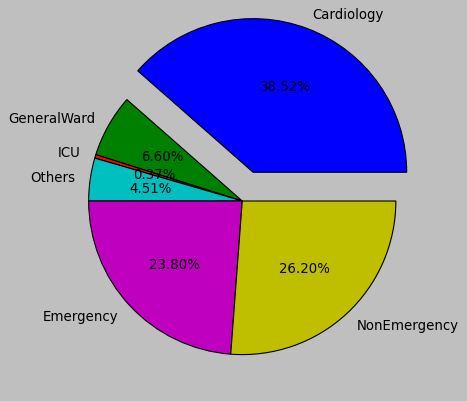

In [37]:
df12=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge') 
var1=df12.groupby(['admission_ward'])['inpatient_number'].count()
var2=df12.groupby(['admission_way'])['inpatient_number'].count()
gk=pd.DataFrame(var1._append(var2)).reset_index()
print(gk)
x=list(gk['index'])
y=list(gk['inpatient_number'])
plt.style.use("classic")
explodes = [0.2,0,0,0,0,0]
plt.pie(y,labels= x,explode= explodes,autopct="%0.2f%%")

## Question 33:

In [38]:
df20=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Labs')
wbc=df20.loc[:,['white_blood_cell']].min()
print("Minimum white blood cell count: ",wbc["white_blood_cell"]) 

Minimum white blood cell count:  1.66


## Question 34:

In [39]:

df21=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge')
dd=df21.loc[:,['discharge_department']]
for index, row in dd.iterrows():
    lastletter = row[0]
    lastletter = lastletter[len(lastletter)-1]
    print("Last letter:",lastletter)

Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: s
Last letter: y
Last letter: y
Last letter: d
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: d
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: d
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: d
Last letter: y
Last letter: y
Last letter: U
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: d
Last letter: y
Last letter: d
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: y
Last letter: s
Last letter: s
Last lette

/var/folders/mc/ndcgy37s0t56x5y0yh673_nw0000gn/T/ipykernel_12144/3186093003.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lastletter = row[0]


## Question 35:

In [40]:
cc="This hackathon is about cardiac outcomes"
str=cc.split(" ")
str=str[-1::-1]
o=' '.join(str)
print("Reversed String:", o)


Reversed String: outcomes cardiac about is hackathon This


## Question 36:

Text(0, 0.5, 'y')

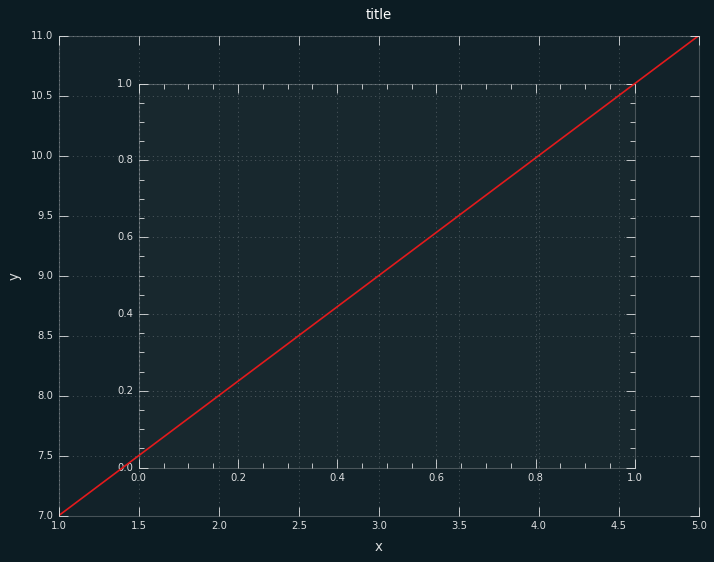

In [41]:
from qbstyles import mpl_style
mpl_style(dark=True)
x=[1,2,3,4,5]
y=[7,8,9,10,11]
fig = plt.figure()
ax= fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_title('title')
ax.set_xlabel('x')
ax.set_ylabel('y')

## Question 37

In [42]:
df13=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge')
num = df13['dischargeDay']
for i in num:
 if (i % 2) == 0:
   print(i,"is Even")
 else:
   print(i,"is Odd")

11 is Odd
8 is Even
5 is Odd
11 is Odd
5 is Odd
6 is Even
10 is Even
27 is Odd
20 is Even
4 is Even
9 is Odd
9 is Odd
11 is Odd
22 is Even
8 is Even
3 is Odd
16 is Even
14 is Even
7 is Odd
10 is Even
5 is Odd
11 is Odd
7 is Odd
9 is Odd
9 is Odd
8 is Even
8 is Even
5 is Odd
11 is Odd
7 is Odd
7 is Odd
10 is Even
15 is Odd
4 is Even
9 is Odd
6 is Even
7 is Odd
7 is Odd
7 is Odd
4 is Even
3 is Odd
5 is Odd
8 is Even
4 is Even
9 is Odd
9 is Odd
11 is Odd
19 is Odd
6 is Even
7 is Odd
15 is Odd
4 is Even
18 is Even
3 is Odd
11 is Odd
14 is Even
12 is Even
11 is Odd
9 is Odd
8 is Even
7 is Odd
2 is Even
9 is Odd
30 is Even
8 is Even
6 is Even
3 is Odd
5 is Odd
21 is Odd
8 is Even
7 is Odd
8 is Even
5 is Odd
5 is Odd
5 is Odd
7 is Odd
10 is Even
6 is Even
10 is Even
7 is Odd
8 is Even
11 is Odd
9 is Odd
15 is Odd
7 is Odd
5 is Odd
7 is Odd
6 is Even
5 is Odd
26 is Even
11 is Odd
3 is Odd
7 is Odd
7 is Odd
2 is Even
14 is Even
12 is Even
6 is Even
10 is Even
4 is Even
9 is Odd
9 is Odd
8 is Ev

## Question 38:

In [43]:
string=tuple(input("Enter a string:"))
val=len(string)
print("Length of tuple:",val)

Enter a string: python


Length of tuple: 6


## Question 39:

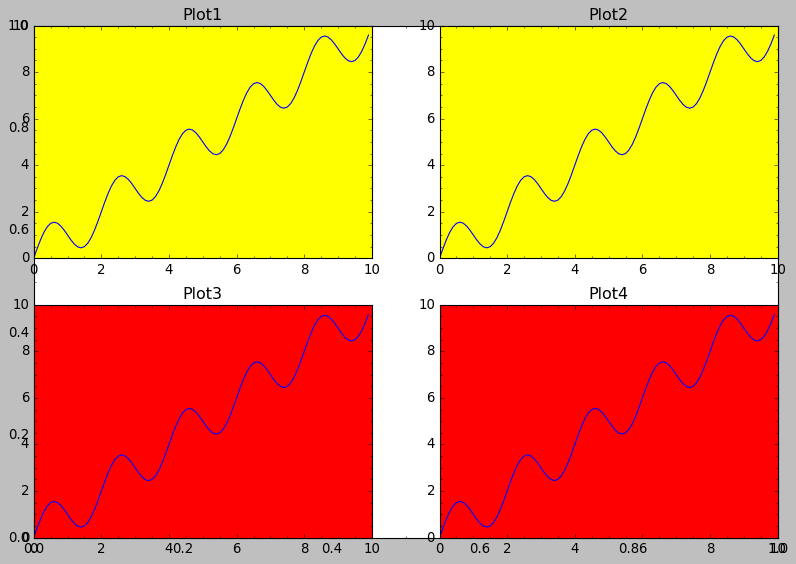

In [44]:
plt.style.use('classic')
x = np.arange(0, 10, 0.1)
y=y = np.sin(np.pi * x) + x
fig,axs = plt.subplots(2,2,figsize=(12, 8))
axs[0,0].plot(x,y)
axs[0,0].set_title("Plot1")
axs[0,0].set_facecolor("yellow")
axs[0,1].plot(x,y)
axs[0,1].set_title("Plot2")
axs[0,1].set_facecolor("yellow")
axs[1,0].plot(x,y)
axs[1,0].set_title("Plot3")
axs[1,0].set_facecolor("red")
axs[1,1].plot(x,y)
axs[1,1].set_title("Plot4")
axs[1,1].set_facecolor("red")

## Question 40:

In [45]:
a=np.random.randint(200,800,25)
print("Random 25 values Between 200-800:",a)

Random 25 values Between 200-800: [628 435 633 674 569 742 639 660 503 434 317 357 584 647 495 633 598 597
 648 489 264 538 428 643 470]


## Question 41:

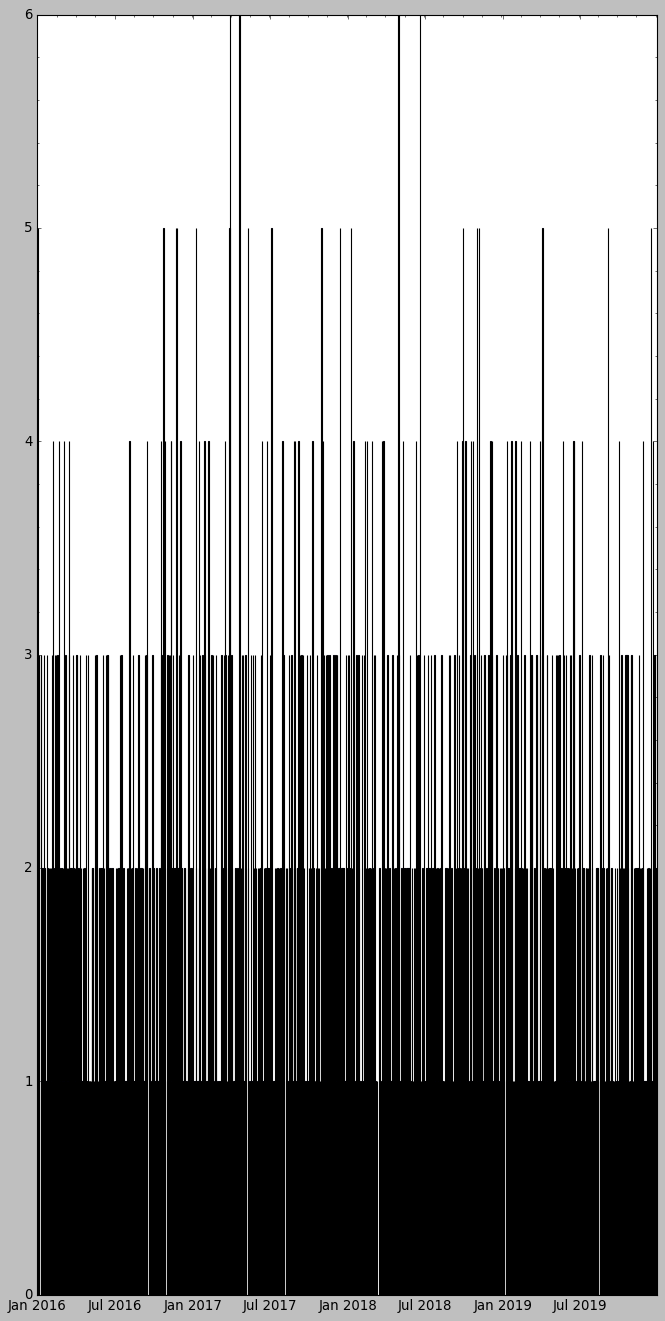

In [46]:
df18=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge') 
df18=df18.groupby(['Admission_date'])['inpatient_number'].count().rename_axis('Admission_date').reset_index(name='Patient Number Count')
x1=df18['Admission_date']
a=df18['Admission_date']
y1=df18['Patient Number Count']
plt.style.use('classic')
plt.figure(figsize=(10, 20))
plt.bar(x1,y1)
#plt.xticks(a, month_names+5)
plt.show()      


## Question 42:

In [47]:
num=np.arange(1,21).reshape(4,5)
print(num)
x=(num[0,0],num[0,1],num[1,2],num[3,3])
y=np.array(x)
print("Array is:",y)
for i in y:
 if(i<9):
  print(i,0)
 else:
  print(i,1)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]
Array is: [ 1  2  8 19]
1 0
2 0
8 0
19 1


## Question 43:

/var/folders/mc/ndcgy37s0t56x5y0yh673_nw0000gn/T/ipykernel_12144/3835781866.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(v, kde=True, palette='muted', bins=10, height=6, aspect=1.5)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


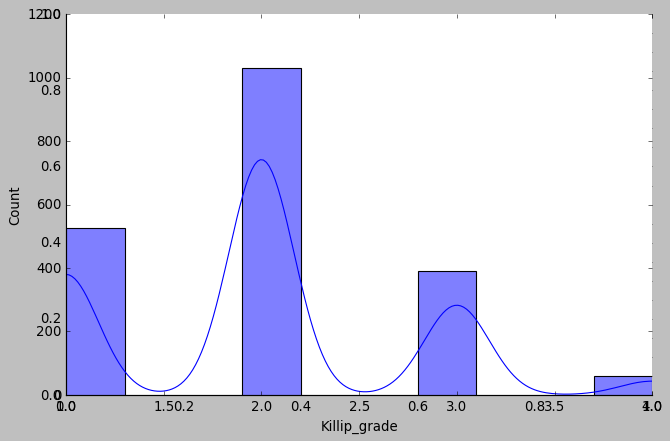

In [48]:
df15=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='CardiacComplications')
v=df15['Killip_grade']
sns.displot(v, kde=True, palette='muted', bins=10, height=6, aspect=1.5)


## Question 44:

In [49]:
today = datetime.date.today()
year = today.year
df9['YearOfBirth']=year-(df9['Age'])
val=df9.loc[(df9['YearOfBirth']==1945)]
val

inpatient_number  gender  weight  height        BMI     occupation  \
6               844094    Male    60.0    1.65  22.038567  UrbanResident   
17              825016  Female    35.0    1.42  17.357667  UrbanResident   
29              861240    Male    57.5    1.60  22.460938  UrbanResident   
32              783621  Female    46.0    1.50  20.444444  UrbanResident   
39              817939  Female    30.0    1.49  13.512905  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
1881            828595  Female    45.0    1.56  18.491124            NaN   
1890            846667  Female    48.0    1.48  21.913806  UrbanResident   
1905            745203    Male    65.0    1.55  27.055151         farmer   
1957            753466  Female    63.0    1.53  26.912726  UrbanResident   
1979            744424  Female    50.0    1.50  22.222222  UrbanResident   

     ageCat  Age  YearOfBirth  
6     79-89   79         1945  
17    79-89   79         1945  
29    79-89   79         1945  
32    79-89   79         1945  
39    79-89   79         1945  
...     ...  ...          ...  
1881  79-89   79         1945  
1890  79-89   79         1945  
1905  79-89   79         1945  
1957  79-89   79         1945  
1979  79-89   79         1945  

[77 rows x 9 columns]

## Question 45:

In [50]:
df16=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge') 
df16['Time']=df16['Admission_date'].dt.time
df16
ss=df16[['Admission_date','Time']]
print(ss)
#i=ss.merge(vv)
#print(i)
#dsw=pd.DataFrame(df16['Time'],df16['Date'])
#print(dsw)

     Admission_date      Time
0        2017-01-24  00:00:00
1        2017-05-05  00:00:00
2        2016-11-18  00:00:00
3        2017-10-02  00:00:00
4        2019-11-17  00:00:00
...             ...       ...
2003     2016-02-07  00:00:00
2004     2017-03-29  00:00:00
2005     2018-01-22  00:00:00
2006     2019-11-27  00:00:00
2007     2017-02-17  00:00:00

[2008 rows x 2 columns]


## Question 46:

In [51]:
df17=pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Demography')
label_encoder = preprocessing.LabelEncoder() 
df17['occupation']= label_encoder.fit_transform(df17['occupation']) 
df17

inpatient_number  gender  weight  height        BMI  occupation ageCat
0               857781    Male    50.0    1.64  18.590125           2  69-79
1               743087  Female    51.0    1.63  19.195303           2  69-79
2               866418    Male    70.0    1.70  24.221453           3  59-69
3               775928    Male    65.0    1.70  22.491349           2  69-79
4               810128  Female    76.0    1.55  31.633715           2  69-79
...                ...     ...     ...     ...        ...         ...    ...
2003            740689  Female    35.0    1.50  15.555556           1  79-89
2004            734280  Female    50.0    1.55  20.811655           2  79-89
2005            781004    Male    75.0    1.70  25.951557           2  39-49
2006            744870    Male    40.0    1.50  17.777778           2  49-59
2007            791864  Female    45.0    1.55  18.730489           2  79-89

[2008 rows x 7 columns]

## Question 47:

In [52]:
np.random.seed(0)
n=np.random.randint(1,10,9)
x=n.reshape(3, 3)
print(x)


[[6 1 4]
 [4 8 4]
 [6 3 5]]


## Question 48:

In [53]:
a=7
print("Multiplication table for 7:")
for i in range(1, 11):
 print(a,'x',i, '=',a*i)

Multiplication table for 7:
7 x 1 = 7
7 x 2 = 14
7 x 3 = 21
7 x 4 = 28
7 x 5 = 35
7 x 6 = 42
7 x 7 = 49
7 x 8 = 56
7 x 9 = 63
7 x 10 = 70


## Question 49:

In [54]:
!pip install pymysql

In [92]:
dbcon=pymysql.connect(host='localhost',user='root',password = "21@October@1986",database='Cardiac_Outcome_db') 
dbcon
pd.read_sql_query("""SELECT * FROM demography where gender='Male'""",dbcon)

/var/folders/mc/ndcgy37s0t56x5y0yh673_nw0000gn/T/ipykernel_12144/3424296273.py:3: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



inpatient_number gender  weight height               BMI     occupation  \
0              857781   Male      50   1,64  18,5901249256395  UrbanResident   
1              866418   Male      70    1,7  24,2214532871972         farmer   
2              775928   Male      65    1,7  22,4913494809689  UrbanResident   
3              844094   Male      60   1,65   22,038567493113  UrbanResident   
4              802296   Male      70   1,72  23,6614386154678  UrbanResident   
..                ...    ...     ...    ...               ...            ...   
775            733199   Male      43   1,68  15,2352607709751         farmer   
776            750447   Male      60   1,68  21,2585034013605  UrbanResident   
777            726701   Male      60    1,6           23,4375  UrbanResident   
778            781004   Male      75    1,7  25,9515570934256  UrbanResident   
779            744870   Male      40    1,5  17,7777777777778  UrbanResident   

    ageCat  
0    69-79  
1    59-69  
2    69-79  
3    79-89  
4    79-89  
..     ...  
775  69-79  
776  79-89  
777  79-89  
778  39-49  
779  49-59  

[780 rows x 7 columns]

## Question 50:

In [56]:
dataset = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs')
print("The lab details of the patient with maximum pulse:\n")
dataset.loc[dataset['pulse'] == dataset['pulse'].max()]

The lab details of the patient with maximum pulse:



inpatient_number  body_temperature  pulse  respiration  \
457            756996              36.0    198           19   

     systolic_blood_pressure  diastolic_blood_pressure   map  fio2  \
457                      105                        69  81.0    33   

     creatinine_enzymatic_method  urea  ...  measured_residual_base  \
457                         64.3  4.78  ...                     1.7   

     measured_bicarbonate  carboxyhemoglobin  body_temperature_blood_gas  \
457                  24.8                0.8                        37.0   

     oxygen_saturation  partial_oxygen_pressure  oxyhemoglobin  anion_gap  \
457               98.0                    125.0           97.6       12.5   

     free_calcium  total_hemoglobin  
457          1.07             132.0  

[1 rows x 107 columns]

## Question 51:

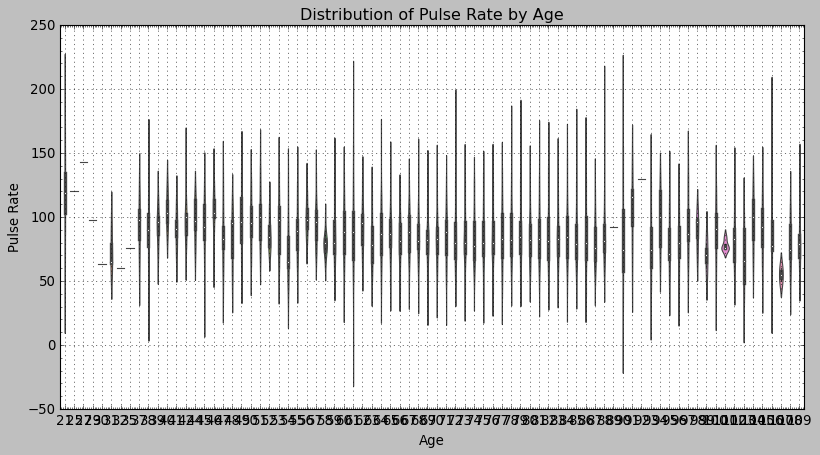

In [57]:
file_path = 'Cardiac_Outcomes.xlsx'
data = pd.read_excel(file_path)
labs_data = pd.read_excel(file_path, sheet_name='Labs')
merged_data = pd.merge(labs_data[['inpatient_number', 'pulse']], df9[['inpatient_number', 'Age']], on='inpatient_number')
plt.style.use("classic")
plt.figure(figsize=(12, 6))
sns.violinplot(x='Age', y='pulse', data=merged_data)
plt.title('Distribution of Pulse Rate by Age')
plt.xlabel('Age')
plt.ylabel('Pulse Rate')
plt.grid(True)
plt.show()

## Question 52:

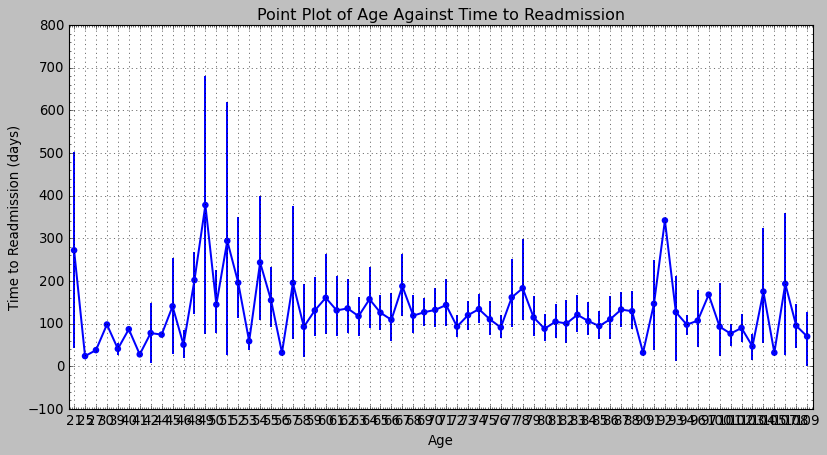

In [58]:

file_path = 'Cardiac_Outcomes.xlsx'
labs_data = pd.read_excel(file_path, sheet_name='Labs')
hospitalization_data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')
readmission_data = hospitalization_data[['inpatient_number', 'readmission_time_days_from_admission']]
age_readmission_data = pd.merge(df9[['inpatient_number', 'Age']], readmission_data, on='inpatient_number')
age_readmission_data.dropna(inplace=True)
plt.figure(figsize=(12, 6))
sns.pointplot(x='Age', y='readmission_time_days_from_admission', data=age_readmission_data)
plt.title('Point Plot of Age Against Time to Readmission')
plt.xlabel('Age')
plt.ylabel('Time to Readmission (days)')
plt.grid(True)
plt.show()


## Question 53:

In [59]:
file_path = 'Cardiac_Outcomes.xlsx'
patient_history_data = pd.read_excel(file_path, sheet_name="PatientHistory", usecols=["inpatient_number", "CCI_score"])
discharge_data = pd.read_excel(file_path, sheet_name="Hospitalization_Discharge", usecols=["inpatient_number", "outcome_during_hospitalization", "admission_ward"])
merged_data = pd.merge(patient_history_data, discharge_data, on='inpatient_number', how='inner')
outcome_mapping = {'Alive': 0, 'Dead': 1, 'DischargeAgainstOrder': 2}
merged_data['outcome_numeric'] = merged_data['outcome_during_hospitalization'].map(outcome_mapping)
merged_data = merged_data.dropna(subset=['CCI_score'])
correlation = merged_data['CCI_score'].corr(merged_data['outcome_numeric'])
print("Correlation Coefficient:", correlation)



Correlation Coefficient: 0.09384336715987608


## Question 54:

In [60]:
numbers = [0,1,2,6,8]
print("i*i For all non-negative integers that are also even numbers :")
for i in numbers:
    if i > 0 and i % 2 == 0:
        print(i*i)


i*i For all non-negative integers that are also even numbers :
4
36
64


## Question 55:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


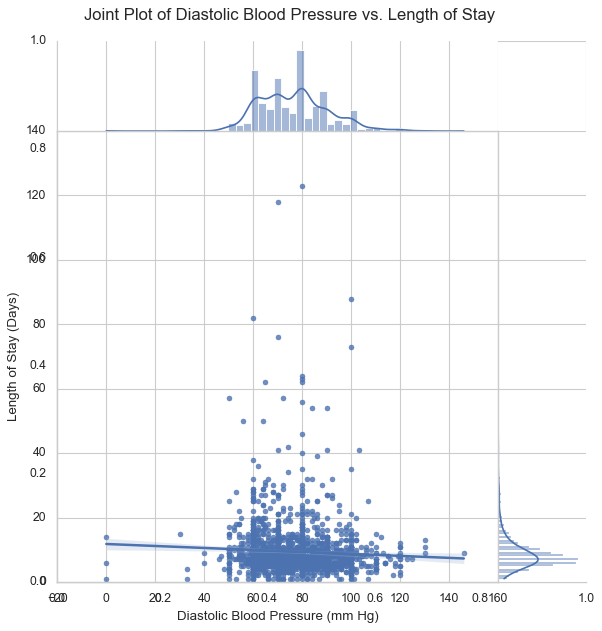

In [61]:
file_path = 'Cardiac_Outcomes.xlsx'
labs_data = pd.read_excel(file_path, sheet_name='Labs')
hospitalization_data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')
diastolic_bp_data = labs_data[['inpatient_number', 'diastolic_blood_pressure']]
length_of_stay_data = hospitalization_data[['inpatient_number', 'dischargeDay']]
joint_data = pd.merge(diastolic_bp_data, length_of_stay_data, on='inpatient_number')
joint_data.dropna(inplace=True)
sns.set_theme(style="whitegrid")
joint_plot = sns.jointplot(x='diastolic_blood_pressure', y='dischargeDay', data=joint_data,
                           kind="reg", height=8, space=0)
joint_plot.set_axis_labels('Diastolic Blood Pressure (mm Hg)', 'Length of Stay (Days)', fontsize=12)
joint_plot.fig.suptitle('Joint Plot of Diastolic Blood Pressure vs. Length of Stay', fontsize=15, y=1.02)
plt.show()

## Question 56:

In [65]:
file_path = 'Cardiac_Outcomes.xlsx'
demography_data = pd.read_excel(file_path, sheet_name='Demography')
data = demography_data.loc[101:200, ['ageCat', 'weight']]
print("The agegroup and weight between indices 101 and 201:")
data

The agegroup and weight between indices 101 and 201:


ageCat  weight
101   69-79    41.0
102   79-89    64.0
103   79-89    61.0
104   79-89    40.0
105   69-79    73.0
..      ...     ...
196   59-69    62.0
197   79-89    50.0
198  89-110    50.0
199   69-79    50.0
200   59-69    63.0

[100 rows x 2 columns]

## Question 57:

In [66]:

file_path = 'Cardiac_Outcomes.xlsx'
patient_history_data1 = pd.read_excel(file_path, sheet_name="PatientHistory", usecols=["inpatient_number", "CCI_score"])
discharge_data1 = pd.read_excel(file_path, sheet_name="Hospitalization_Discharge", usecols=["inpatient_number", "outcome_during_hospitalization", "admission_ward"])
merged_data1 = pd.merge(patient_history_data1, discharge_data1, on='inpatient_number', how='inner')
outcome_mapping1 = {'Alive': 0, 'Dead': 1, 'DischargeAgainstOrder': 2}
merged_data1['outcome_numeric'] = merged_data1['outcome_during_hospitalization'].map(outcome_mapping1)
merged_data1 = merged_data1.dropna(subset=['CCI_score'])
pivot_table = pd.pivot_table(
    merged_data1,
    values='inpatient_number',  # Count of patients
    index='outcome_during_hospitalization',  # Rows (outcome types)
    columns='admission_ward',  # Columns (admission wards)
    aggfunc='count'  # Count of patients in each category
)
print('\n')
print("Pivot Table:")
print(pivot_table)



Pivot Table:
admission_ward                  Cardiology  GeneralWard  ICU  Others
outcome_during_hospitalization                                      
Alive                                 1468          237   12     168
Dead                                     8            1    1       1
DischargeAgainstOrder                   67           26    2      12


## Question 58:

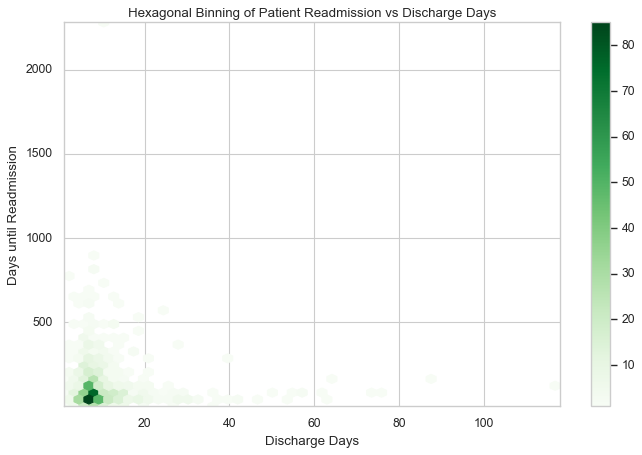

In [67]:
file_path = 'Cardiac_Outcomes.xlsx'
data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')
x =  data['dischargeDay']
y = data['readmission_time_days_from_admission']
plt.figure(figsize=(10, 6))
hb = plt.hexbin(x, y, gridsize=50, cmap='Greens', mincnt=1)
plt.colorbar(hb)
plt.xlabel('Discharge Days')
plt.ylabel('Days until Readmission')
plt.title('Hexagonal Binning of Patient Readmission vs Discharge Days')
plt.show()


In [68]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


## Question 59:

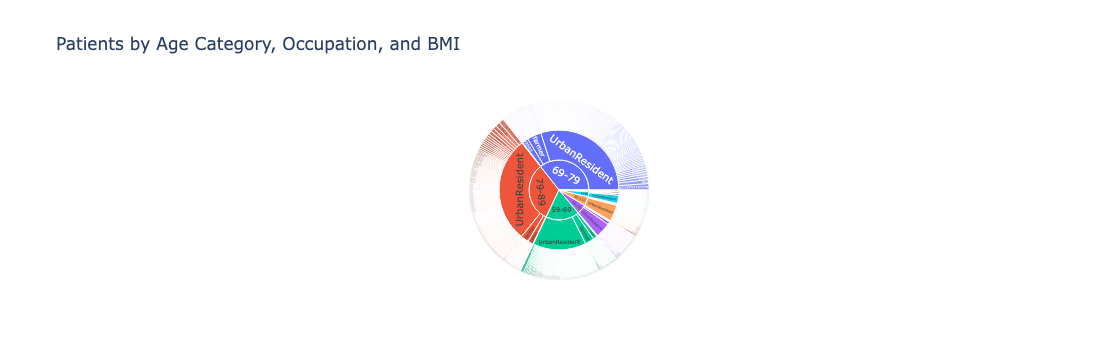

In [69]:
import plotly.express as px
file_path = 'Cardiac_Outcomes.xlsx'
data = pd.read_excel(file_path, sheet_name='Demography')
data =  data.dropna(subset=['ageCat', 'occupation', 'BMI'])
fig = px.sunburst(data, path=['ageCat', 'occupation', 'BMI'], title="Patients by Age Category, Occupation, and BMI")
fig.show()

## Question 60:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



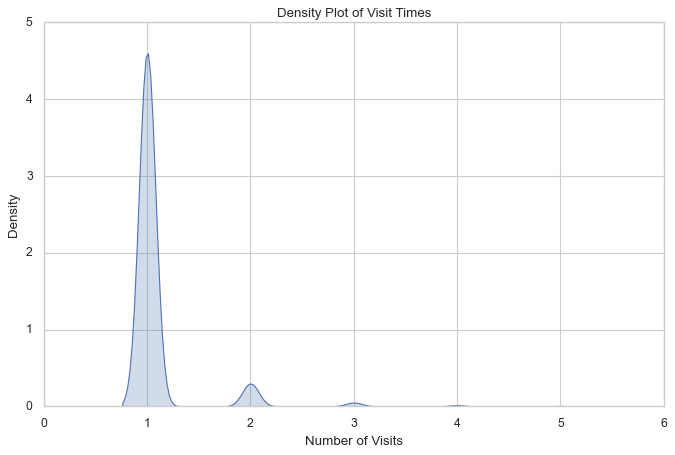

In [70]:
file_path = 'Cardiac_Outcomes.xlsx'
data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')
data['visit_times'] = pd.to_numeric(data['visit_times'], errors='coerce')
data = data.dropna(subset=['visit_times'])
plt.figure(figsize=(10, 6))
sns.kdeplot(data['visit_times'], fill=True)
plt.title('Density Plot of Visit Times')
plt.xlabel('Number of Visits')
plt.ylabel('Density')
plt.show()

## Question 61:

In [71]:
num=np.arange(1,31).reshape(6,5)
print(num)
x=(num[2,0],num[2,1],num[3,0],num[3,1])
y=np.array(x)
print("Array is:",y)


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]
Array is: [11 12 16 17]


## Question 62:

In [72]:
file_path = 'Cardiac_Outcomes.xlsx'
data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')
data_labs = pd.read_excel(file_path, sheet_name='Labs')
merged_data = pd.merge(data[['DestinationDischarge', 'death_within_28_days', 'inpatient_number']], data_labs[['mean_platelet_volume', 'inpatient_number']], on='inpatient_number')
alive_patients = merged_data[merged_data['DestinationDischarge'] == 'Home']
alive_and_died_within_28_days = alive_patients[alive_patients['death_within_28_days'] == 1]
percent_died_within_28 = (len(alive_and_died_within_28_days) / len(alive_patients)) * 100
mean_platelet_volume = alive_and_died_within_28_days['mean_platelet_volume'].mean()
print(f"Percentage of patients with an outcome of 'Alive' who died within 28 days: {percent_died_within_28:.2f}%")
print(f"Mean Platelet Volume among this group: {mean_platelet_volume}")

Percentage of patients with an outcome of 'Alive' who died within 28 days: 1.04%
Mean Platelet Volume among this group: 10.592857142857143


## Question 63:

In [73]:
file_path = 'Cardiac_Outcomes.xlsx'
data = pd.read_excel(file_path, sheet_name='Hospitalization_Discharge')
filtered_data = data[data['DestinationDischarge'].str.contains('h', case=False)]
filtered_data = filtered_data[['inpatient_number','DestinationDischarge']]
print(filtered_data)

      inpatient_number DestinationDischarge
0               857781                 Home
1               743087                 Home
2               866418                 Home
3               775928                 Home
4               810128                 Home
...                ...                  ...
2002            754589   HealthcareFacility
2003            740689   HealthcareFacility
2004            734280   HealthcareFacility
2005            781004   HealthcareFacility
2007            791864                 Home

[1782 rows x 2 columns]


## Question 64:

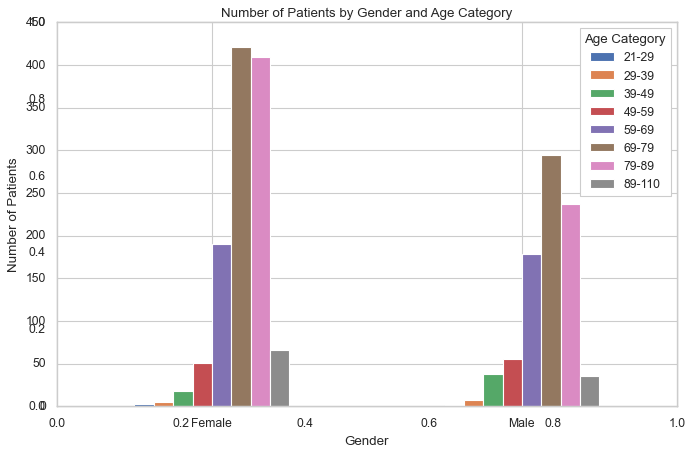

In [74]:
file_path = 'Cardiac_Outcomes.xlsx'
data = pd.read_excel(file_path, sheet_name='Demography')
grouped_data = data.groupby(['gender', 'ageCat']).size().unstack(fill_value=0)
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Patients by Gender and Age Category')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Keep the labels on the x-axis readable
plt.legend(title='Age Category')
plt.show()

## Question 65:

In [75]:
df65 = pd.read_excel('Cardiac_Outcomes.xlsx')
unique_admission=df65['admission_ward'].unique()
ward_visits=df65.groupby('admission_ward')['visit_times'].count()
print(ward_visits)
maxvisits=ward_visits.idxmax()
print('{0} has maximum number of visits scheduled'.format(maxvisits))

admission_ward
Cardiology     1547
GeneralWard     265
ICU              15
Others          181
Name: visit_times, dtype: int64
Cardiology has maximum number of visits scheduled


## Question 66:

In [76]:
df_gender = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Demography')
df_discharge_department = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge')
merged_df = pd.merge(df_discharge_department, df_gender,on='inpatient_number')
grouped = merged_df.groupby(['admission_ward','gender'])
patient_counts = grouped.size()
print("Total count of patients in each discharge department based on gender:")
print(patient_counts)

Total count of patients in each discharge department based on gender:
admission_ward  gender
Cardiology      Female    898
                Male      649
GeneralWard     Female    152
                Male      113
ICU             Female      9
                Male        6
Others          Female    104
                Male       77
dtype: int64


## Question 67:

In [77]:
df_patient_prescriptions = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Patient_Precriptions')
unique_patients_per_medication = df_patient_prescriptions.groupby('Drug_name')['inpatient_number'].nunique()
print("Number of unique patients prescribed each type of medication:")
print(unique_patients_per_medication)

Number of unique patients prescribed each type of medication:
Drug_name
Aspirin enteric-coated tablet                        958
Atorvastatin calcium tablet                          822
Benazepril hydrochloride tablet                      434
Clopidogrel Hydrogen Sulphate tablet                 401
Deslanoside injection                               1017
Digoxin tablet                                       999
Dobutamine hydrochloride injection                    22
Enoxaparin Sodium injection                          113
Furosemide injection                                1720
Furosemide tablet                                   1641
Heparin Sodium injection                             153
Hydrochlorothiazide tablet                           283
Isoprenaline Hydrochloride injection                  30
Isosorbide Mononitrate Sustained Release tablet      326
Meglumine Adenosine Cyclophosphate for injection    1115
Metoprolol Succinate Sustained-release tablet        523
Milrinone inject

## Question 68:

In [78]:
df_filtered = df_discharge_department[df_discharge_department['dischargeDay'] > 20]
outcome_counts = df_filtered.groupby('inpatient_number')['outcome_during_hospitalization'].value_counts()
top_patients = df_filtered['inpatient_number'].value_counts().nlargest(5)
print("Top 5 patients with highest discharge days greater than 20 and their most common outcome:")
for patient_id, _ in top_patients.items():
    most_common_outcome = outcome_counts[patient_id].idxmax()
    print(f"Patient ID: {patient_id}, Most Common Outcome: {most_common_outcome}")

Top 5 patients with highest discharge days greater than 20 and their most common outcome:
Patient ID: 787530, Most Common Outcome: Alive
Patient ID: 744531, Most Common Outcome: Alive
Patient ID: 791880, Most Common Outcome: Alive
Patient ID: 757711, Most Common Outcome: Alive
Patient ID: 836855, Most Common Outcome: Alive


## Question 69:

In [79]:
df_demographics = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
df_prescriptions = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Patient_Precriptions')
demographics_patient_ids = set(df_demographics['inpatient_number'])
prescriptions_patient_ids = set(df_prescriptions['inpatient_number'])
patients_not_in_prescriptions = demographics_patient_ids - prescriptions_patient_ids
print("Patient IDs not in prescriptions but in demographics:")
print(patients_not_in_prescriptions)

Patient IDs not in prescriptions but in demographics:
{789308}


## Question 70:

In [80]:
df70 = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
df70['Admission_date'] = pd.to_datetime(df70['Admission_date'])
df70['Weekday'] = df70['Admission_date'].dt.day_name()
weekday_counts = df70['Weekday'].value_counts()
print(weekday_counts)
most_frequent_weekday = weekday_counts.idxmax()
print("On average, the most frequent weekday of admission is:", most_frequent_weekday)

Weekday
Monday       308
Sunday       305
Wednesday    294
Thursday     289
Friday       276
Saturday     270
Tuesday      266
Name: count, dtype: int64
On average, the most frequent weekday of admission is: Monday


## Question 71:

In [81]:
df = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Hospitalization_Discharge')
df['Admission_date'] = pd.to_datetime(df['Admission_date'])
df['Year'] = df['Admission_date'].dt.year
yearly_admissions = df['Year'].value_counts()
print(yearly_admissions)
year_with_max_admissions = yearly_admissions.idxmax()
print("The year with the maximum admissions is:", year_with_max_admissions)

Year
2016    518
2018    498
2017    496
2019    496
Name: count, dtype: int64
The year with the maximum admissions is: 2016


## Question 72:

In [82]:
df72 = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
gender_counts = df72['gender'].value_counts()
print(gender_counts)
total_records = len(df72)
print(total_records)
percentage_male = (gender_counts['Male'] / total_records) * 100
percentage_female = (gender_counts['Female'] / total_records) * 100
print("Percentage of males in the dataset:", round(percentage_male,2))
print("Percentage of females in the dataset:", round(percentage_female,2))

gender
Female    1163
Male       845
Name: count, dtype: int64
2008
Percentage of males in the dataset: 42.08
Percentage of females in the dataset: 57.92


## Question 73:

In [83]:
df73 = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
def extract_age_range(age_range):
   start, end = map(int, age_range.split('-'))
   return start, end
df73[['ageStart', 'ageEnd']] = df73['ageCat'].apply(lambda x: pd.Series(extract_age_range(x)))
sorted_df = df73.sort_values(by=['ageStart', 'ageEnd', 'weight'], ascending=[True, False, False])
youngest_highest_weight = sorted_df.groupby('ageCat').first().reset_index()
print(youngest_highest_weight)
youngest_patient_highest_weight = youngest_highest_weight[['ageCat', 'weight']]
print("\npatient in the youngest age category who weighs the most:\n",youngest_patient_highest_weight.iloc[0])

   ageCat  inpatient_number  gender  weight  height        BMI     occupation  \
0   21-29            831184  Female    82.5    1.62  31.435757  UrbanResident   
1   29-39            832159    Male    92.0    1.76  29.700413  UrbanResident   
2   39-49            818210    Male    85.0    1.70  29.411765  UrbanResident   
3   49-59            803906    Male    95.0    1.72  32.111952  UrbanResident   
4   59-69            821768    Male   115.0    1.75  37.551020  UrbanResident   
5   69-79            750702    Male    96.0    1.68  34.013605  UrbanResident   
6   79-89            842939    Male    90.0    1.64  33.462225  UrbanResident   
7  89-110            744861    Male    84.0    1.68  29.761905  UrbanResident   

   ageStart  ageEnd  
0        21      29  
1        29      39  
2        39      49  
3        49      59  
4        59      69  
5        69      79  
6        79      89  
7        89     110  

patient in the youngest age category who weighs the most:
 ageCat    21

## Question 74:

In [84]:
df74 = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
deaths = df74[df74['outcome_during_hospitalization'] == 'Dead']
deaths_by_ward = deaths['admission_ward'].value_counts()
print(deaths_by_ward)
lowest_death_count_ward = deaths_by_ward.idxmin()
print("Admission ward with the lowest count of Outcome Death:", lowest_death_count_ward)

admission_ward
Cardiology     8
ICU            1
GeneralWard    1
Others         1
Name: count, dtype: int64
Admission ward with the lowest count of Outcome Death: ICU


## Question 75:

In [85]:
df_hospitalization_discharge = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
df_cardiac_complications = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='CardiacComplications')
deaths = df_hospitalization_discharge[df_hospitalization_discharge['outcome_during_hospitalization'] == 'Dead']
death_patient_ids = deaths['inpatient_number']
myocardial_infarction_patients = df_cardiac_complications[df_cardiac_complications['myocardial_infarction'] == 1]

deaths_with_myocardial_infarction = death_patient_ids.isin(myocardial_infarction_patients['inpatient_number']).sum()
percentage_deaths_with_myocardial_infarction = (deaths_with_myocardial_infarction / len(death_patient_ids)) * 100
print("Percentage of patients with an outcome of death who had myocardial infarction:", round(percentage_deaths_with_myocardial_infarction,2))

Percentage of patients with an outcome of death who had myocardial infarction: 9.09


## Question 76:

In [86]:
df_cardiac_complications = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='CardiacComplications')
df_with_both_heart_failure = df_cardiac_complications[df_cardiac_complications['type_of_heart_failure'] == 'Both']
congestive_heart_failure_count_with_both = df_with_both_heart_failure['congestive_heart_failure'].sum()
total_both_heart_failure_count = len(df_with_both_heart_failure)
ratio_congestive_to_total_with_both = congestive_heart_failure_count_with_both / total_both_heart_failure_count
print("Ratio of patients with congestive heart failure to those who had both types of heart failure:", round(ratio_congestive_to_total_with_both,2))

Ratio of patients with congestive heart failure to those who had both types of heart failure: 0.91


## Question 77:

In [87]:
#LIst the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death) 
df76 = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
df77 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Responsivenes')
#df76=df76['outcome_during_hospitalization'].unique()
a1=df76[['inpatient_number','outcome_during_hospitalization']]
a2=df77[['inpatient_number','GCS']]
s=a1.merge(a2)
s
count1=s.loc[(s['GCS']<=8),['inpatient_number','GCS','outcome_during_hospitalization']]
a=count1['outcome_during_hospitalization'].value_counts()
print("Count of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score:")
print(a)

Count of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score:
outcome_during_hospitalization
DischargeAgainstOrder    8
Alive                    6
Dead                     5
Name: count, dtype: int64


## Question 78:

In [88]:
df78 = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs')
tachycardia_criteria = df78['pulse'] > 100
bradycardia_criteria = df78['pulse'] < 60
tachycardia_patients = df78[tachycardia_criteria]
bradycardia_patients = df78[bradycardia_criteria]
tachycardia_count = len(tachycardia_patients)
bradycardia_count = len(bradycardia_patients)
print("Number of patients with tachycardia:", tachycardia_count)
print("Number of patients with bradycardia:", bradycardia_count)

Number of patients with tachycardia: 417
Number of patients with bradycardia: 154


## Question 79:

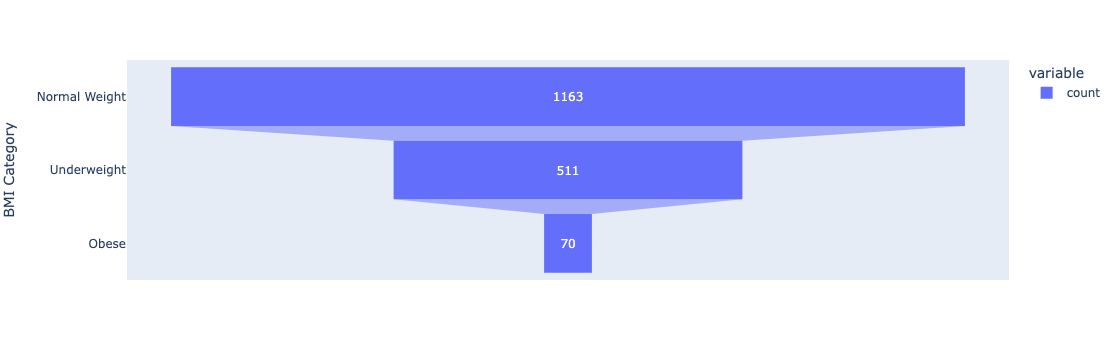

In [89]:

df_demography = pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif (bmi >=18.5) & (bmi <= 24.9):
        return 'Normal Weight'
    elif bmi>=30:
        return 'Obese'

df_demography['BMI Category'] = df_demography['BMI'].apply(categorize_bmi)
bmi_counts = df_demography['BMI Category'].value_counts()
bmi=pd.DataFrame(bmi_counts)
x=bmi.index
y=bmi['count'].values

import plotly.express as px
fig = px.funnel(bmi)
fig.show()


## Question 80:

In [90]:
df21 = pd.read_excel('Cardiac_Outcomes.xlsx',sheet_name='Demography')
def split_age(age):
 return pd.Series(age.split("-", 1))
df21[['Age1', 'Age2']] = df21['ageCat'].apply(split_age)  
df21['Age'] = [np.random.randint(s, e) for s,e in zip(df21['Age1'], df21['Age2'])]
df21.drop(columns=["Age1"], inplace=True)
df21.drop(columns=["Age2"], inplace=True)
print(df21)
print("\nAfter deleting age column iteratively:")
for col in df21.columns:
 if 'Age' in col:
     del df21[col]
     print(df21)
        

      inpatient_number  gender  weight  height        BMI     occupation  \
0               857781    Male    50.0    1.64  18.590125  UrbanResident   
1               743087  Female    51.0    1.63  19.195303  UrbanResident   
2               866418    Male    70.0    1.70  24.221453         farmer   
3               775928    Male    65.0    1.70  22.491349  UrbanResident   
4               810128  Female    76.0    1.55  31.633715  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
2003            740689  Female    35.0    1.50  15.555556         Others   
2004            734280  Female    50.0    1.55  20.811655  UrbanResident   
2005            781004    Male    75.0    1.70  25.951557  UrbanResident   
2006            744870    Male    40.0    1.50  17.777778  UrbanResident   
2007            791864  Female    45.0    1.55  18.730489  UrbanResident   

     ageCat  Age  
0     69-79   76  
1     69-79   75  
2     59-69   67  
3     69-79